<a href="https://colab.research.google.com/github/aleksejalex/PyPEF_internal/blob/main/ELLS_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELLS - Practical Introduction into Programming with Python

<a href="https://pef.czu.cz/en/"><img src="https://aleksejalex.4fan.cz/ells/temp_banner.jpeg" alt="banner" width="1000"></a>





[GitHub Repository](https://github.com/aleksejalex/2024_ells_python)

## Motivation
We would like computers to perform complicated tasks (medical diagnosis, stocks prediction, ...).

2 artificial intelligence approaches are distinguished:
 - **knowledge-based**📚🦉: a computer program whose logic encodes a large number of properties of the world, usually developed by a team of experts over many years. a.k.a. *knowledge-based* approach
 - **machine learning**🔮👨🏻‍💻: extract information from past observations (data) and extrapolate to make predictions


Plan for this lecture:
 - intro to machine learning
 - perceptron: yesterday's regression task seen differently
 - classifiers: split the data into groups

## Machine learning
 = field of study in AI, main aim: development of statistical **algorithms that can learn from data and generalize to unseen data**
 - *"Field of study that gives computers the ability to learn without being explicitly programmed."* - Arthur Samuel, 1959

Types of ML:
 - **supervised**: learns connection between input ($x$) and output ($y$); the algortihm learns from given examples of "correct answers"
   - examples: spam filtering, machine translation, speech recognition, online advertising, ...
 - **unsupervised**: learns patterns from input data without explicit supervision or labeled outcomes; seeks to find hidden structure or relationships in the data without guidance from a labeled target variable
   - examples: clustering customers based on purchasing behavior, reducing the number of features in a dataset while preserving its important information, discovering interesting associations or relationships between variables in large datasets(market basket analysis to identify frequently co-occurring items in transactions), ...
 - **reinforcement**: agent learns to make decisions by interacting with an environment. The agent learns from feedback in the form of rewards or penalties received for its actions, with the goal of maximizing cumulative rewards over time
   - examples: robotics, game playing, autonomous vehicles, recommendation systems, ....

*Example from (your) life:*
 - when you learned in primary school how animals are classified, it was *supervised learning*: you were given both animal names and the correct classification (Amphibia, Mammalia, ...) and you understood the connecting principle (or memorised it)

 - when a child learns do differentiate colors, it's an *unsupervised learning*: it 'automatically' sees that marbles are of different colors, and is able to split them into red ones and blue ones. Noone explains to him what actually is red colour and how it's different from a blue one

 - when you were in driving school, it was *reinforcement learning*: the instructor told you after every maneuveur if you got it right or wrong

[structure pie chart](https://chart-studio.plotly.com/create/?fid=SolClover:40#/)

<img src="https://lh7-us.googleusercontent.com/xOCj9XQMPcLFix1tN828tExM8ElqNebmXiGJcl7lzCwQsk1M6C6e17zsgrq1el5VnpW6wtxQeGtOG-EETQeRFvnkNMClwD0rDQ7Uit0z8Xq73ZZWd4XDP4W0bHhDlY-ZiFIe8oHsvREZcG4q03K7crM" alt="banner" width="700" align="center">

Before we proceed further, we will need some libraries we are already familiar with:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## scikit-learn
<a href="https://scikit-learn.org/stable/index.html"><img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" alt="banner" width="300" align="right"></a>
 = library offering algorithms for classification, regression, clustering, etc.
 - user friendly, doesn't require deep knowledge
 - compatible with NumPy, SciPy, matplotlib and Pandas
 - has very nice documentation [here](https://scikit-learn.org/stable/index.html)

 
 

In [3]:
import sklearn

Before we get to ML, let's get familiar with some functions we will use:

 - generate random data in specific way (so you can easily train your classifying skills)

In [4]:
from sklearn.datasets import make_blobs

# Generate random data using make_blobs
num_samples = 15
x, y = make_blobs(n_samples=num_samples, centers=2, cluster_std=1.3, random_state=42)

function output are pairs, each pair is: $(\vec{x}, y)$, where:
 - $y \in \lbrace 0, 1, 2, ... N \rbrace $, where $N$ is number of classes ... index, to which class the observation belongs
 - $\vec{x} = (x_1, x_2, ..., x_a)$, where $x_j$ is a value of $j$-th feature ... vector of features (example: if our observation are customers, their features can be: age, gender, amount of spent money, ...)

In [5]:
x

array([[ 3.85766024,  4.38113132],
       [ 3.85904854,  1.59396781],
       [-2.19464667,  6.52702181],
       [ 6.54522224,  1.67966049],
       [ 4.7276655 ,  0.12099704],
       [-3.82587808,  9.42280766],
       [-4.75159081,  8.28331234],
       [ 3.93218129,  2.11736905],
       [ 3.14358719,  2.46157711],
       [-3.68962892,  7.17829132],
       [-0.45622096, 10.01195128],
       [-3.11164062,  8.40883745],
       [-2.81359701,  8.70990808],
       [-3.11951432,  9.71961418],
       [ 4.62233244,  0.59814548]])

In [6]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

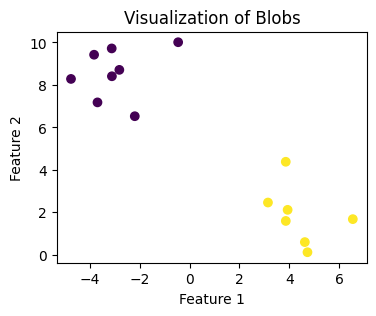

In [7]:
plt.figure(figsize=(4, 3))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', marker='o')
plt.title('Visualization of Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

You can see there basically 2 gaussian hats (~ 15 samples from 2 gaussian hats).

<a href="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.geeksforgeeks.org%2Fwp-content%2Fcdn-uploads%2F20190523171258%2Foverfitting_2.png&f=1&nofb=1&ipt=042ce96dbef98d7aa8ba54ca1e90ce3d0132347982c54dd1ca7580e6da8411e3&ipo=images"><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.geeksforgeeks.org%2Fwp-content%2Fcdn-uploads%2F20190523171258%2Foverfitting_2.png&f=1&nofb=1&ipt=042ce96dbef98d7aa8ba54ca1e90ce3d0132347982c54dd1ca7580e6da8411e3&ipo=images" alt="banner" width="600" align="right"></a>
 - function that splits our data (`X, y`) into training dataset and testing dataset.
This is needed to evaluate how successfull are the predictions of our model on those data that it hasn't seen. (The ability to extrapolate is important.)

Also this helps to avoid overfitting: if model learns to much from our data, it starts to remember not only the main pattern, but also things like random noise

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [10]:
print(f"size of x = {x.shape}")
print(f"size of X_train = {X_train.shape}")
print(f"size of X_test = {X_test.shape}")
print(f"size of y = {y.shape}")
print(f"size of y_train = {y_train.shape}")
print(f"size of y_test = {y_test.shape}")

size of x = (15, 2)
size of X_train = (12, 2)
size of X_test = (3, 2)
size of y = (15,)
size of y_train = (12,)
size of y_test = (3,)


In [11]:
# we don't want to mess with different variables onder same name, so:
del(x, y, X_train, X_test, y_train, y_test)

### Perceptron - an "atom" of neural networks


<a href="https://media.geeksforgeeks.org/wp-content/uploads/20230426162726/Perceptron-1.webp"><img src="https://media.geeksforgeeks.org/wp-content/uploads/20230426162726/Perceptron-1.webp" alt="banner" width="500" align="right"></a>

recommended reading: 
 - simpliest tutorial on [geeksforgeeks](https://www.geeksforgeeks.org/what-is-perceptron-the-simplest-artificial-neural-network/?ref=header_search)
 - more details and history on [wikipedia](https://en.wikipedia.org/wiki/Perceptron)

**Perceptron** is the simplest neural network consisting of single node. One of it's benefits is simple implementation and relatively high accuracy, but it can be used only when these assumptions are made:
1.   data are *linearly separable*
2.   classification problem is *binary*

Perceptron *finds one hyperplane* (for example in 2D - line) that separates the data.

**Decision rule:**
to check whether datapoint $x$ lies on positive or negative side of the hyperplane.

 - mathematically hyperplane is a linear function defined in vector space:
\begin{aligned}
f(x) = <w|x> + b = w^{t} x + b = \sum_j w_j \cdot x_j + b = \sum_j w_j \cdot x_j + b \cdot 1,
\end{aligned}

where $x$ is positional vector, $w$ and $b$ are coeficients (also vectors) defining concrete hyperplane out of all existing hyperplanes in defined space.


 - to determine "on which side" of hyperplane is point $x$ we use activation function - here Heaviside (step) function defined as
\begin{align}
        h(x) = \left\{
        \begin{array}{cl}
        1 & \text{if } x \ge 0 \\
        0 & \text{otherwise}
        \end{array}
        \right.
    \end{align}


* let's note $\hat{y}(x) := h\left( w^tx + b \right)$ (**approximation/prediction**) This formula returns either 1 or 0 depending on which side of hyperplane is located point $x$

**Update rule:** now we have our result $\hat{y}$ (computed above) and also real value (part of train data). We want to check whether our result is equal to real value or not. In second case we want to change parameters $w$ and $b$ (rotate/shift the hyperplane) in preferred way. In other words - if our prediction was wrong, we want to update our parameters describing the hyperplane.

\begin{aligned}
w = w + \alpha (<y|x> - <\hat{y}|x>) = w + \alpha (y - \hat{y})x,
\end{aligned}

where $\alpha \in [0,1]$ is *learning rate*.

<a href="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Perceptron_example.svg/900px-Perceptron_example.svg.png"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Perceptron_example.svg/900px-Perceptron_example.svg.png" alt="banner" width="370" align="right"></a>

*Technically*, update looks like this:
 - we try to make a prediction
 - we compute the loss (since we have the real value of `y` and predicted one, we can compute the difference)
 - we update weights and bias ($w$ and $b$) accordingly

Perceptron implementation:

In [12]:
class OurPerceptron:
    def __init__(self, num_inputs, learning_rate=0.01):
        # Initialize weights and learning rate
        self.weights = np.random.rand(num_inputs + 1)  # +1 for bias (b)
        self.learning_rate = learning_rate  # controls how much we adjust the weights with each step of training
    
    def linear(self, inputs):
        # Compute the linear combination of inputs and weights
        return np.dot(inputs, self.weights[1:]) + self.weights[0]
    
    def Heaviside_step_fn(self, z):
        # Heaviside step function
        return np.heaviside(z, 1)
        
    def predict(self, inputs):
        # Predict function using Heaviside step function
        Z = self.linear(inputs)
        return self.Heaviside_step_fn(Z)
    
    def loss(self, prediction, target):
        # Calculate loss
        return target - prediction
    
    def train(self, inputs, target):
        # Update weights based on prediction error
        prediction = self.predict(inputs)
        error = self.loss(prediction, target)
        self.weights[1:] = self.weights[1:] + self.learning_rate * error * inputs
        self.weights[0] = self.weights[0] + self.learning_rate * error
        
    def fit(self, X, y, num_epochs):
        # Fit the model to the data for a number of epochs
        # 'num_epochs' = number of times we go through the entire training dataset
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y):
                self.train(inputs, target)

Let's test it:

In [13]:
# Example usage

# Training data:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Initialize and train perceptron
perceptron = OurPerceptron(num_inputs=2, learning_rate=0.1)
perceptron.fit(X, y, num_epochs=10)

# Test perceptron
print(perceptron.predict([0, 0]))  # Output: 0
print(perceptron.predict([0, 1]))  # Output: 1
print(perceptron.predict([1, 0]))  # Output: 1
print(perceptron.predict([1, 1]))  # Output: 1

0.0
1.0
1.0
1.0


Seems it works!🎉 Let's try something more interesting:

Accuracy: 0.0


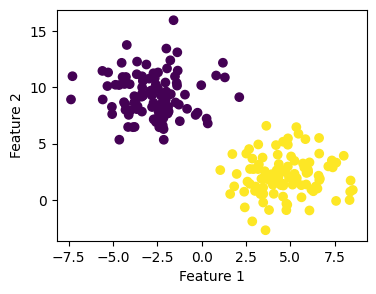

In [14]:
# Import the necessary library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.8, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Initialize the Perceptron with the appropriate number of inputs
perceptron = OurPerceptron(num_inputs = X_train.shape[1])

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train, num_epochs=1000)

# Prediction
y_pred_our = perceptron.predict(X_test)

# Test the accuracy of the trained Perceptron on the testing data
accuracy = np.mean(y_pred_our != y_test)
print("Accuracy:", accuracy)

# Plot the dataset
plt.figure(figsize=(4,3))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_our)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [15]:
y_pred_our

array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.])

To technical? Don't worry, there's a built-in functionality in scikit-learn library:

In [25]:
# we have just the same X, y, and then also same X_train, X_test, y_train, y_test

In [26]:
from sklearn.linear_model import Perceptron

# Create a perceptron classifier
clf = Perceptron(eta0=0.1, max_iter=1000)  # eta0 is learning rate

# Train the perceptron classifier
clf.fit(X_train, y_train)

# Predict on the test data
y_pred_sklearn = clf.predict(X_test)

# Calculate accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_sklearn)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [27]:
y_pred_our - y_pred_sklearn

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

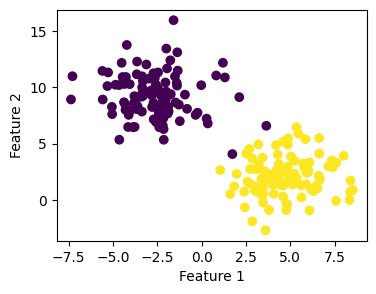

In [28]:
plt.figure(figsize=(4,3))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sklearn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

let's see both graphs together:

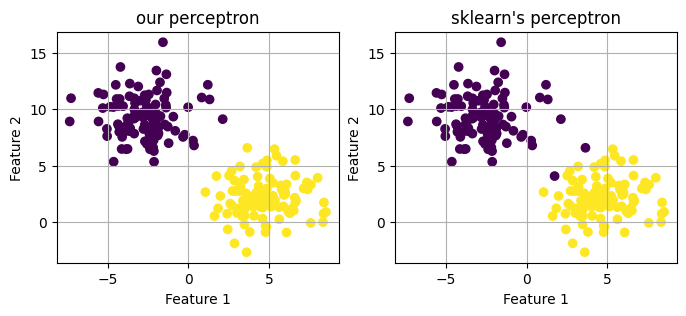

In [29]:
plt.figure(figsize=(8,3), dpi=100)
plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_our)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.title("our perceptron")
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sklearn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.title("sklearn's perceptron")
plt.show()

The biggest difference is execution time 😉

In [30]:
perceptron.weights 

array([ 0.92494943,  0.22669606, -0.24471147])

Let's draw a line:

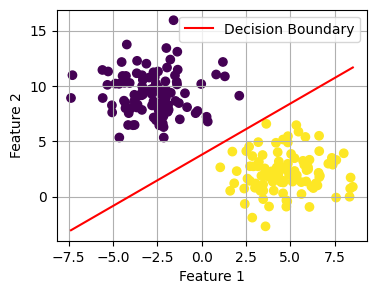

In [31]:
# Extract weights
bias = perceptron.weights[0]
w1 = perceptron.weights[1]
w2 = perceptron.weights[2]

# Compute slope and intercept
slope = -w1 / w2
intercept = -bias / w2

# Generate x values for plotting
x_vals = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100)
y_vals = slope * x_vals + intercept

# Plot the scatter plot with decision boundary
plt.figure(figsize=(4,3))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_our)
plt.plot(x_vals, y_vals, '-r', label='Decision Boundary')  # '-r' for red line
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


Very useful&important way to check how well did you classify is **confusion matrix** (which can be either represented as a matrix or visualised as a figure).

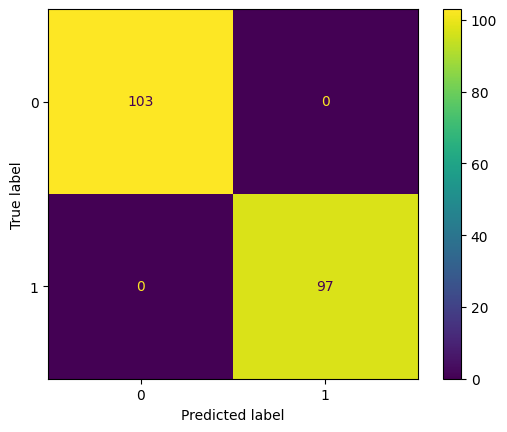

In [32]:
from sklearn.metrics import confusion_matrix 
from sklearn import metrics 

conf_matrix = confusion_matrix(y_test, y_pred_our) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix) 
  
cm_display.plot() 
plt.show()

### Support Vector Machine (SVM)
 = algorithm of supervised ML, usually used for classification task
 [https://scikit-learn.org/stable/modules/svm.html#svm-classification](https://scikit-learn.org/stable/modules/svm.html#svm-classification)

 **The core idea:** to find a hyperplane that best divides a dataset into classes. 
 
 A hyperplane is a decision boundary that separates different classes in the feature space. In two dimensions, this hyperplane is a line, but in higher dimensions, it can be a plane or a hyperplane.

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. 
Intuitively, a good separation is achieved by the hyper-plane that **has the largest distance to the nearest training data points** of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier. 

The figure below shows the decision function for a linearly separable problem, with three samples on the margin boundaries, called “support vectors”:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png" alt="banner" width="450">

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate random data using make_blobs
x, y = make_blobs(n_samples=300, centers=2, cluster_std=1.8, random_state=42)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and fit SVM classifier
model = SVC(kernel='linear')   # {'precomputed', 'linear', 'poly', 'rbf', 'sigmoid'}
model.fit(x_train, y_train)

# Evaluate the model
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9958333333333333
Testing Accuracy: 0.9833333333333333


/tmp/ipykernel_455264/3865062080.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolors='k', marker='x', label="Testing data")


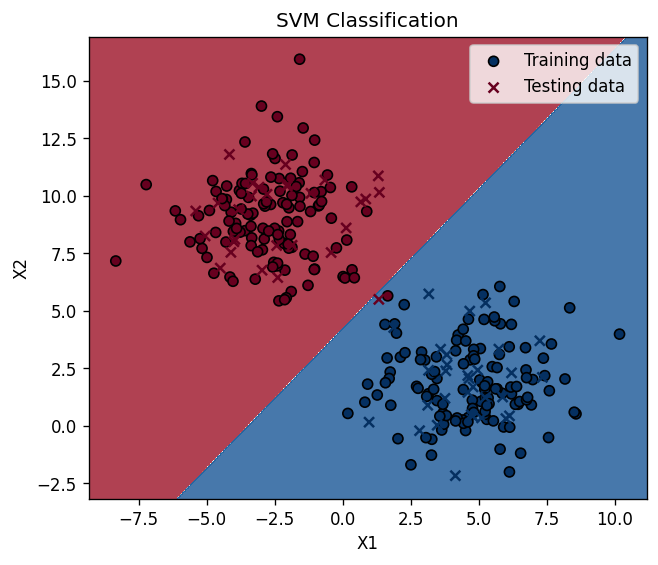

In [34]:
# #################################################
# Plot decision boundary (works only for 2D features)
plt.figure(figsize=(6,5), dpi=120)
if x_train.shape[1] == 2:
    # Create a meshgrid to plot decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k', label="Training data")
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolors='k', marker='x', label="Testing data")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification')
plt.legend()
plt.show()

💡 Perceptron classifier can be used only for *binary* classification. But it's not the case for SVM! Try to modify number of groups (`centers` in `make_blobs`) and see how the image above changes.

### k-means clustering

 = algorithm for *clustering* data , i.e. splitting the data into groups based on their similarity. The number of clusters (groups) of given (either by the formulation of the task, or by your expert knowledge, or by computational limits, ...).

**k-means algorithm**:
1) choose a number of clusters, $k$.
2) randomly select $k$ points rom your dataset as initial centroids (*centroid* = a point situated in a center of $k$-th cluster).
3) assign each datapoint from your data to the nearest centroid. This is how you get $k$ clusters.
4) **update step**: find a new centroid of each cluster by calculating the mean value of all data points assigned to this cluster
5) repeat from step 3) until either centroids no longer change (convergence is reached) or a maximum number of iterations is reached (we don't want our algorithms to run forever)

In [35]:
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=100, centers=2, cluster_std=1.3, random_state=42)  

🚨 Notice: it's unsupervised learning! We don't know "the answers", that's why we don't need `y`.

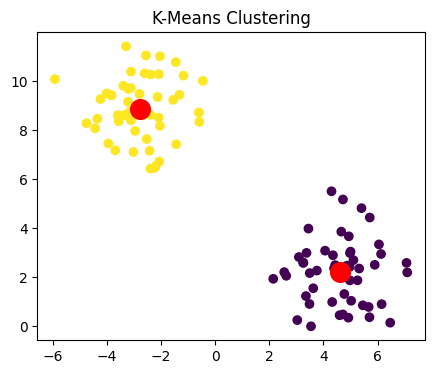

In [36]:
# Model training
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Plotting
plt.figure(figsize=(5,4), dpi=100) # figure is initialised
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_) # plot the datapoints (on x-axis 0th feature, on y-axis 1st feature, different colours acc. to kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')  # plot centroids
plt.title('K-Means Clustering')
plt.show()

In [37]:
kmeans.labels_

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

## Irises - one more time:

Let's try to look again on a simple dataset - iris dataset. 

Our task now will be:
1) understand its properties (using different techniques we have already learned)
2) try to build up a classifier, which can predict what class iris belongs to based on values of sepal/petal length/width

Practical use-case: you pick a flower, you measure it -> you want a reliable software that will classify it.

In [38]:
df_iris = sns.load_dataset('iris')

df_iris.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


In [39]:
df_iris.describe(include='all')


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Dataset contains 150 observations of iris flowers. The parameters measured were lengths and widths, the "response" variable was the only categorical one present in this dataset: the name of species of the observed flower (3 possible values).

In [40]:
df_iris["species"] = df_iris["species"].astype("category")

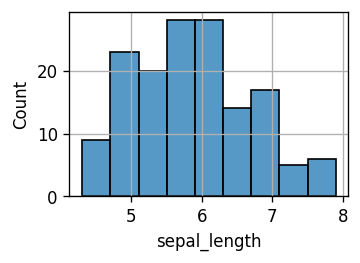

In [41]:
plt.figure(figsize=(3,2), dpi=120)
sns.histplot(data=df_iris['sepal_length'])
plt.grid()
plt.show()

📈 3d picture of the dataset --> separate script

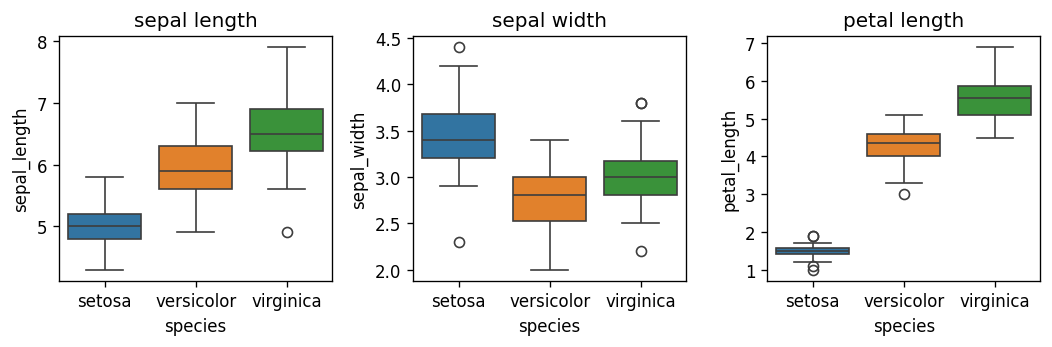

In [42]:
plt.figure(figsize=(9,3), dpi=120)
plt.subplot(1,3,1)
sns.boxplot(x='species', y='sepal_length', data=df_iris, hue='species')
plt.title("sepal length")
plt.subplot(1,3,2)
sns.boxplot(x='species', y='sepal_width', data=df_iris, hue='species')
plt.title("sepal width")
plt.subplot(1,3,3)
sns.boxplot(x='species', y='petal_length', data=df_iris, hue='species')
plt.title("petal length")
plt.tight_layout()
plt.show()

Pairplot makes the first impression of dataset for us:

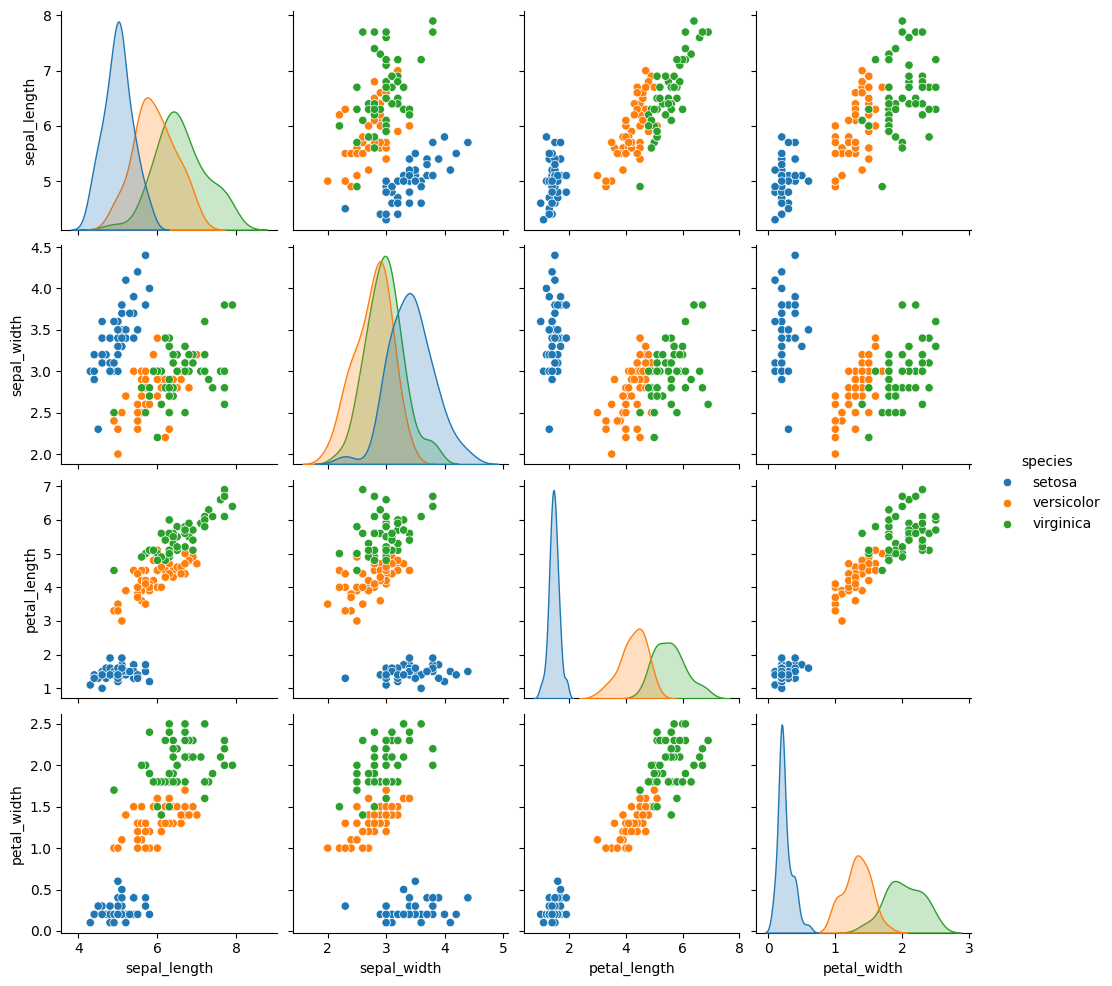

In [43]:
sns.pairplot(data=df_iris, hue='species')
plt.show()

Let's also visualise a statistical relationship:

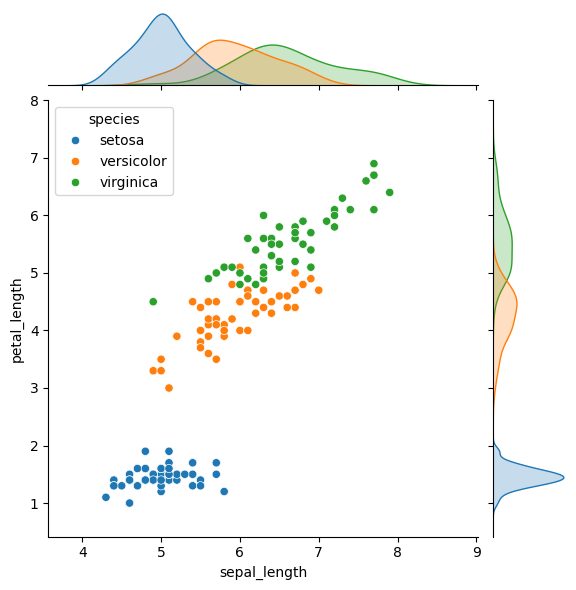

In [44]:
sns.jointplot(x="sepal_length", y="petal_length", data=df_iris, hue = 'species')

We can suspect that classes can be seperated. Let's use SVM:

In [45]:
df_iris['species'] = pd.factorize(df_iris['species'])[0] + 1

In [46]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into features (X) and target (y)
X = df_iris.drop('species', axis=1)
y = df_iris['species']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LinearSVC classifier
clf = LinearSVC()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [47]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

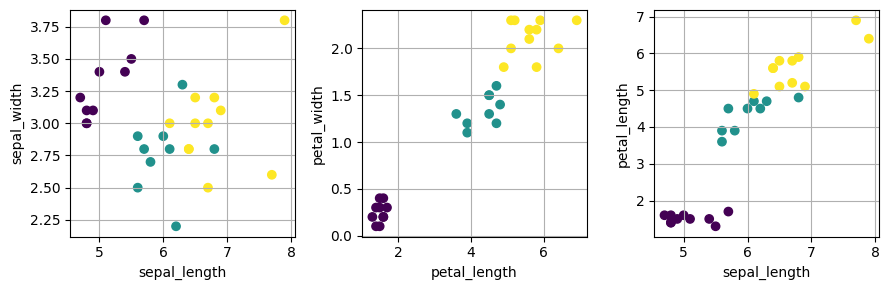

In [48]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_pred)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.grid()
plt.subplot(1,3,2)
plt.scatter(X_test['petal_length'], X_test['petal_width'], c=y_pred)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.grid()
plt.subplot(1,3,3)
plt.scatter(X_test['sepal_length'], X_test['petal_length'], c=y_pred)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.grid()
plt.tight_layout()
plt.show()

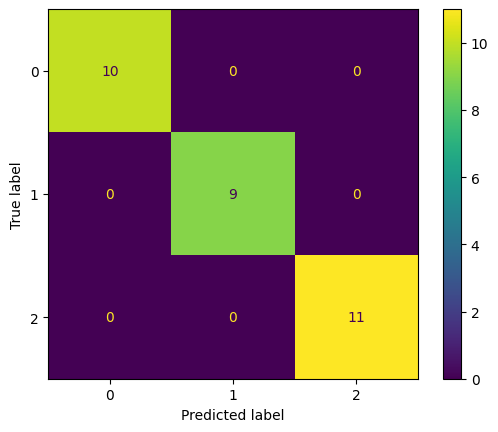

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix) 
  
cm_display.plot() 
plt.show()

Sometimes it's better to have a 'curvy' decision border. For that purpose, you can use several modifications of SVM:

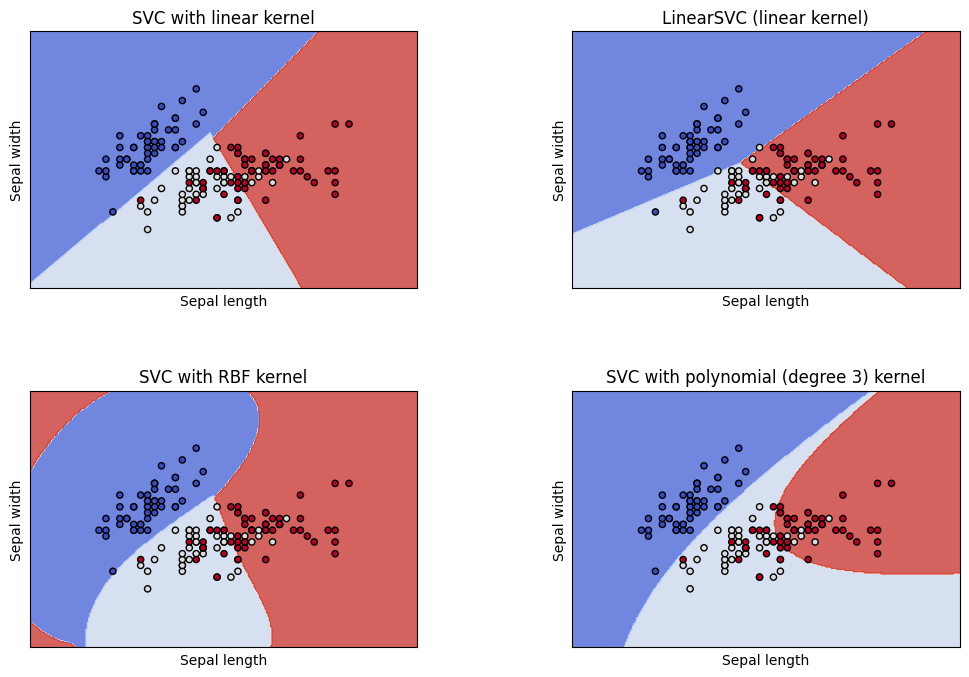

In [39]:
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features.
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Concluding remarks and advices
 - remember [Occam's razor]() (aka principle of parsimony, aka [KISS principle](https://en.wikipedia.org/wiki/KISS_principle)): 
 
        > "The simplest explanation is usually the best one."
 - 

## Additional sources (where to seek for information):
 - Intro to ML made by Google (free to use) [here](https://developers.google.com/machine-learning/intro-to-ml)
 - tutorial on ML on w3schools: [here](https://www.w3schools.com/python/python_ml_getting_started.asp)
 - lectures from Snaford University [here](https://ee104.stanford.edu/lectures/overview.pdf)

<div style="font-style: italic; font-size: 14px;">
    <p>This material was prepared by Department of Information Engineering (<a href="https://www.pef.czu.cz/en">PEF ČZU</a>) exclusively for purposes of ELLS summer school "Practical Introduction into Programming with Python". Any distribution or reproduction of this material, in whole or in part, without prior written consent of the authors is prohibited.</p>
    <p>This material is shared under the <b>Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International Public License</b>, <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link</a>.</p>
</div>


`
#Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
`